In [121]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd

from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima.model import ARIMA
from fracdiff.sklearn import Fracdiff

<function matplotlib.pyplot.show(close=None, block=None)>

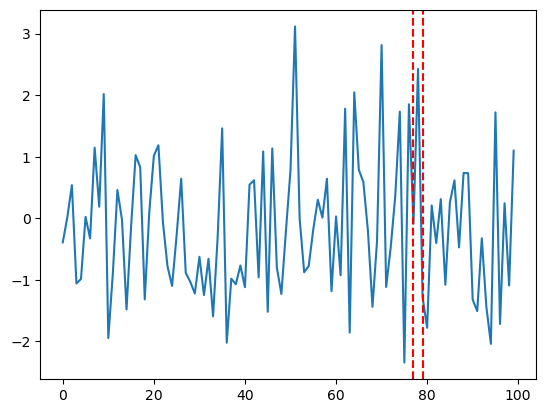

In [40]:
plt.plot(series)
plt.axvline(x=77, color='r', linestyle='--')
plt.axvline(x=79, color='r', linestyle='--')
plt.show

# Step1: 生成长记忆时间序列

In [101]:
# 生成一个长记忆时间序列
np.random.seed(1)
n = 1000
alpha = 0.1
x = np.zeros(n)
x[0] = np.random.normal(0, 1)
for i in range(1, n):
    x[i] = alpha * x[i-1] + np.random.normal(0, 1)

# 计算时间序列的分数阶差分

diff_order = 0.6
diff_x1 = Fracdiff(x, diff_order)

In [102]:
diff_x1.d

array([ 1.62434536e+00, -4.49321877e-01, -5.73103940e-01, -1.13027902e+00,
        7.52379728e-01, -2.22630072e+00,  1.52218169e+00, -6.08988732e-01,
        2.58140223e-01, -2.23556353e-01,  1.43975230e+00, -1.91616548e+00,
       -5.14033752e-01, -4.35457730e-01,  1.09022367e+00, -9.90868900e-01,
       -2.71515098e-01, -9.05009928e-01, -4.82872461e-02,  5.77986489e-01,
       -1.04282053e+00,  1.04044166e+00,  1.00563489e+00,  6.03057828e-01,
        9.61161732e-01, -5.87611686e-01, -1.81651394e-01, -9.53934574e-01,
       -3.63281537e-01,  4.94027313e-01, -6.42258020e-01, -4.60979329e-01,
       -7.33270633e-01, -9.18532705e-01, -7.63099401e-01, -8.89745391e-02,
       -1.12620780e+00,  1.21794918e-01,  1.67198167e+00,  9.09242327e-01,
       -1.00911320e-01, -8.97720096e-01, -8.36930303e-01,  1.60876157e+00,
        2.11683912e-01, -6.15827255e-01,  1.29332759e-01,  2.11318841e+00,
        3.31477794e-01,  6.50350889e-01,  3.65205409e-01, -3.15729306e-01,
       -1.17409113e+00, -

In [103]:
print(type(diff_x1))

<class 'fracdiff.sklearn.fracdiff.Fracdiff'>


In [104]:
diff_x=diff_x1.d

In [105]:
diff_x.shape


(1000,)

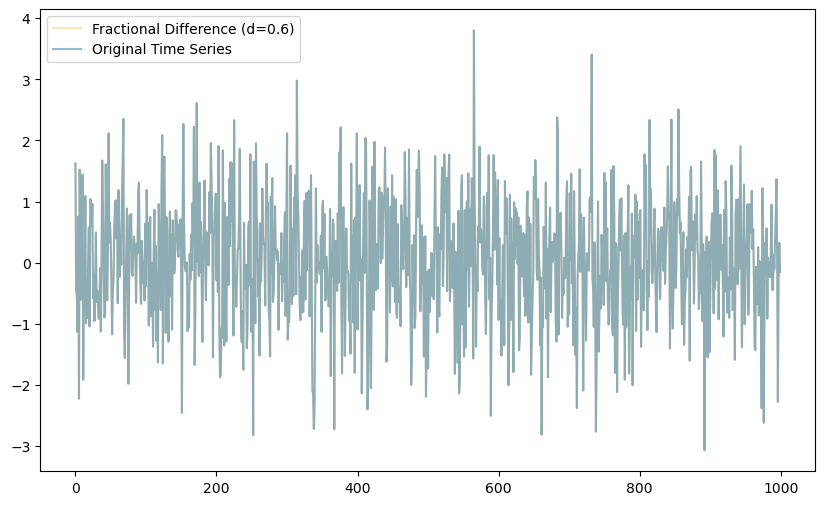

In [108]:
plt.figure(figsize=(10, 6))

plt.plot(diff_x, label='Fractional Difference (d={})'.format(diff_order),color='orange',alpha=0.3)
plt.plot(x, label='Original Time Series',alpha=0.5)
plt.legend()
plt.show()


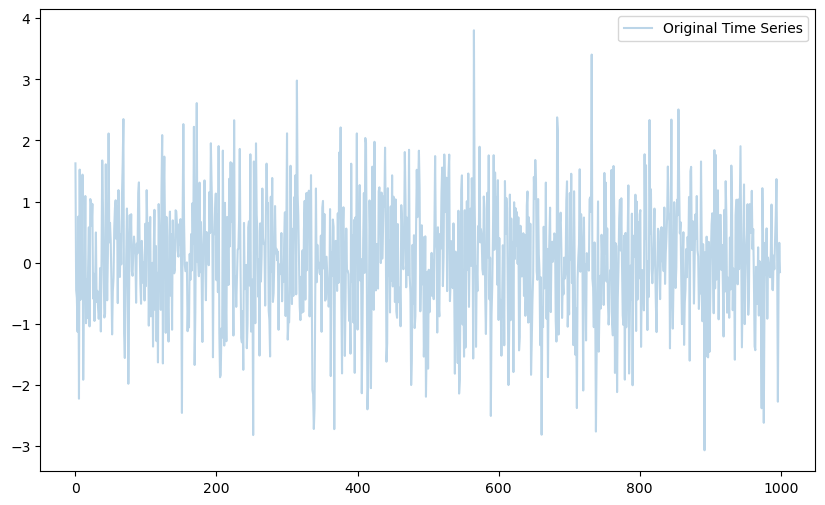

In [109]:
plt.figure(figsize=(10, 6))

#plt.plot(diff_x, label='Fractional Difference (d={})'.format(diff_order),color='red')
plt.plot(x, label='Original Time Series',alpha=0.3)
plt.legend()
plt.show()

In [110]:
# 估计时间序列的长程相关性程度
acf_x = acf(diff_x, fft=False)
pacf_x = pacf(diff_x, method='ols')


In [112]:
# 找到时间序列的 change points
# 可以使用多种方法，例如计算长程相关性程度的一阶差分，然后找到差分的峰值位置
acf_diff = np.diff(acf_x)
change_point = np.argmax(acf_diff)

# 将变化点的位置作为时间序列的 change points
change_points = [change_point]

# 输出变化点的位置
print('Change point at {}'.format(change_point))



Change point at 22


In [113]:
# 将变化点的位置作为分界点，分割时间序列
x1 = x[:change_point]
x2 = x[change_point:]

In [116]:
len(x1)

22

In [118]:
len(x2)

978

In [119]:
len(x)

1000

In [122]:
# 对每个时间序列分别拟合 ARIMA 模型
order1 = (1, 0, 1)
order2 = (0, 0, 1)
model1 = ARIMA(x1, order=order1)
model2 = ARIMA(x2, order=order2)
result1 = model1.fit()
result2 = model2.fit()



In [123]:
# 输出模型拟合结果
print('Model 1 ARIMA({},{},{})\n{}'.format(order1[0], order1[1], order1[2], result1.summary()))
print('Model 2 ARIMA({},{},{})\n{}'.format(order2[0], order2[1], order2[2], result2.summary()))

Model 1 ARIMA(1,0,1)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -25.470
Date:                Thu, 04 May 2023   AIC                             58.939
Time:                        17:40:02   BIC                             63.304
Sample:                             0   HQIC                            59.967
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2119      0.026     -8.090      0.000      -0.263      -0.161
ar.L1         -0.0911      0.451     -0.202      0.840      -0.975       0.793
ma.L1         -0.9999    492.93

In [124]:
print('Model 2 ARIMA({},{},{})\n{}'.format(order2[0], order2[1], order2[2], result2.summary()))

Model 2 ARIMA(0,0,1)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  978
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1365.849
Date:                Thu, 04 May 2023   AIC                           2737.698
Time:                        18:10:55   BIC                           2752.354
Sample:                             0   HQIC                          2743.274
                                - 978                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0473      0.034      1.392      0.164      -0.019       0.114
ma.L1          0.0820      0.032      2.562      0.010       0.019       0.145
sigma2         0.9562      0.04